Importing the dependency

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 52.2MB/s]


In [3]:
!unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("/content/data.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.shape

(569, 33)

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df = df.iloc[:,:-1]

In [11]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
def helper(val):
  if val=="M":
    return 1  # Cancer Positive
  else:
    return 0 # Negative

In [15]:
df["diagnosis"] =  df["diagnosis"].apply(helper)

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X = df.iloc[:,2:]
y = df.iloc[:,1:2]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [19]:
X_train.shape

(455, 30)

Building the Neural Network

In [20]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
# Setting up the layers of Neural Networks

model = Sequential()

model.add(Dense(20,activation = "relu",input_dim=30))
# model.add(Dropout(0.1))
# tf.keras.regularizers.l2(0.02)

model.add(Dense(30,activation="relu"))
# model.add(Dropout(0.1))
# tf.keras.regularizers.l2(0.02)

model.add(Dense(33,activation="relu"))
# model.add(Dropout(0.1))
# tf.keras.regularizers.l2(0.02)

model.add(Dense(1,activation = "sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 30)                630       
                                                                 
 dense_2 (Dense)             (None, 33)                1023      
                                                                 
 dense_3 (Dense)             (None, 1)                 34        
                                                                 
Total params: 2307 (9.01 KB)
Trainable params: 2307 (9.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss="binary_crossentropy" ,optimizer="adam",metrics=["accuracy"])

In [27]:
record = model.fit(X_train_std,y_train,epochs=10,validation_data=(X_test_std,y_test))

Epoch 1/10
15/15 [==============================] - 1s 20ms/step - loss: 0.6353 - accuracy: 0.7121 - val_loss: 0.5412 - val_accuracy: 0.8509
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.8835 - val_loss: 0.3872 - val_accuracy: 0.9561
Epoch 3/10
15/15 [==============================] - 0s 14ms/step - loss: 0.3250 - accuracy: 0.9516 - val_loss: 0.2525 - val_accuracy: 0.9737
Epoch 4/10
15/15 [==============================] - 0s 17ms/step - loss: 0.2145 - accuracy: 0.9560 - val_loss: 0.1621 - val_accuracy: 0.9737
Epoch 5/10
15/15 [==============================] - 0s 16ms/step - loss: 0.1513 - accuracy: 0.9692 - val_loss: 0.1175 - val_accuracy: 0.9737
Epoch 6/10
15/15 [==============================] - 0s 14ms/step - loss: 0.1193 - accuracy: 0.9736 - val_loss: 0.0940 - val_accuracy: 0.9825
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 0.1002 - accuracy: 0.9758 - val_loss: 0.0852 - val_accuracy: 0.9825
Epoch 8/10
15/

In [28]:
model2 = keras.Sequential([
                            keras.layers.Flatten(input_shape=(30,)),  # Using Flatten layer in order to convert our input into a single layer
                            keras.layers.Dense(20,activation = "relu"),
                            keras.layers.Dense(20,activation = "relu"),
                            keras.layers.Dense(2,activation="sigmoid")
])

In [29]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
record2 = model2.fit(X_train_std,y_train,epochs=10,validation_data=(X_test_std,y_test))

Epoch 1/10
15/15 [==============================] - 3s 35ms/step - loss: 0.5064 - accuracy: 0.7538 - val_loss: 0.3496 - val_accuracy: 0.8509
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.3453 - accuracy: 0.8769 - val_loss: 0.2356 - val_accuracy: 0.9561
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.9231 - val_loss: 0.1728 - val_accuracy: 0.9737
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1952 - accuracy: 0.9385 - val_loss: 0.1334 - val_accuracy: 0.9825
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 0.1620 - accuracy: 0.9429 - val_loss: 0.1101 - val_accuracy: 0.9825
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1383 - accuracy: 0.9516 - val_loss: 0.0938 - val_accuracy: 0.9825
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1211 - accuracy: 0.9692 - val_loss: 0.0861 - val_accuracy: 0.9825
Epoch 8/10
15/15

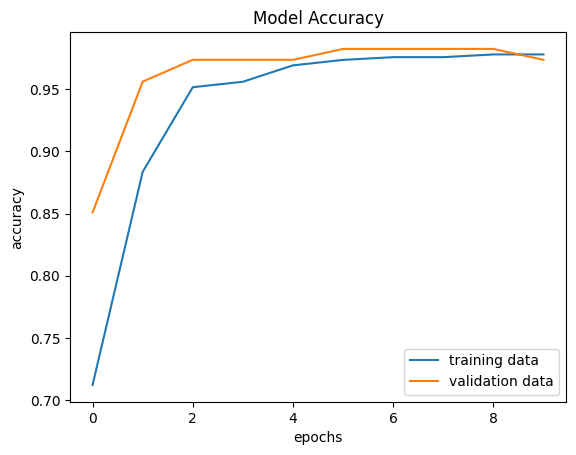

In [31]:
plt.plot(record.history["accuracy"])
plt.plot(record.history["val_accuracy"])

plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend(["training data","validation data"])
plt.show()

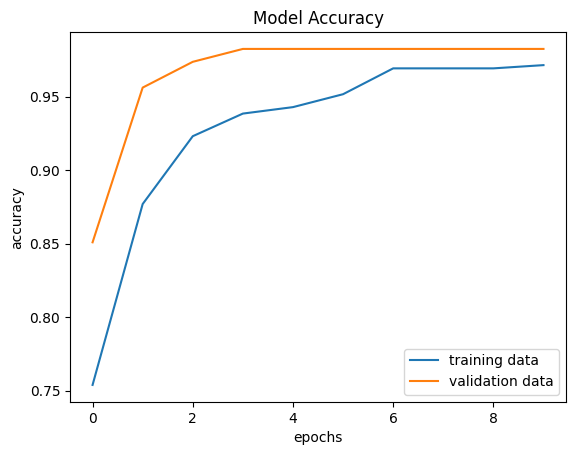

In [32]:
plt.plot(record2.history["accuracy"])
plt.plot(record2.history["val_accuracy"])

plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend(["training data","validation data"])
plt.show()

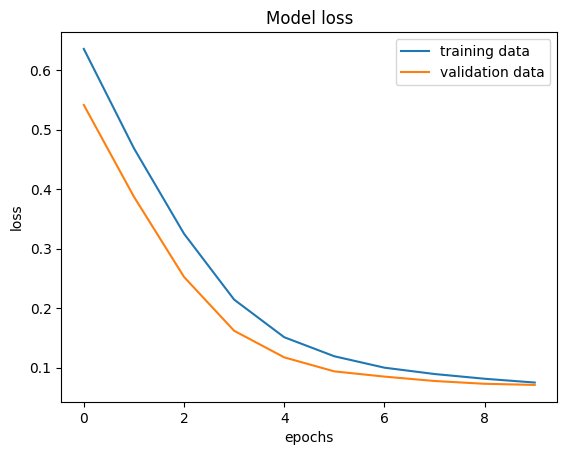

In [33]:
plt.plot(record.history["loss"])
plt.plot(record.history["val_loss"])

plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend(["training data","validation data"])
plt.show()

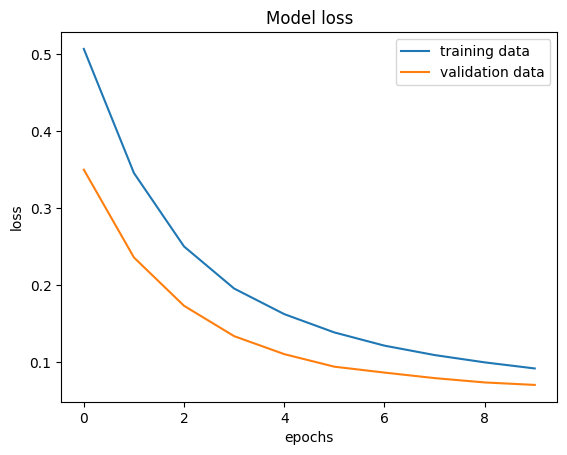

In [34]:
plt.plot(record2.history["loss"])
plt.plot(record2.history["val_loss"])

plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend(["training data","validation data"])
plt.show()

Accuracy of model on test data

In [35]:
loss , accuracy = model.evaluate(X_test_std,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9737


In [37]:
loss , accuracy = model2.evaluate(X_test_std,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9825


In [39]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 5ms/step


In [49]:
Y_pred[1]

array([0.99075884], dtype=float32)

In [50]:
np.array(y_test)[1]

array([1])

In [77]:
X_test_std[0]

array([-0.46649743, -0.13728933, -0.44421138, -0.48646498,  0.28085007,
        0.04160589, -0.11146496, -0.26486866,  0.41524141,  0.13513744,
       -0.02091509, -0.29323907, -0.17460869, -0.2072995 , -0.01181432,
       -0.35108921, -0.1810535 , -0.24238831, -0.33731758, -0.0842133 ,
       -0.2632354 , -0.14784208, -0.33154752, -0.35109337,  0.48001942,
       -0.09649594, -0.03583041, -0.19435087,  0.17275669,  0.20372995])

**Building the Predictive system**

In [78]:
input_data = [18.22,18.7,120.3,1033,0.1148,0.1485,0.1772,0.106,0.2092,0.0631,0.8337,1.593,4.877,98.81,0.003899,0.02961,0.02817,0.009222,0.02674,0.005126,20.6,24.13,135.1,1321,0.128,0.2297,0.2623,0.1325,0.3021,0.07987]
# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

if prediction[0]>0.5:
  print("You are suffering from Cancer")
else:
  print("You are not having any disease")


1/1 [==============================] - 0s 30ms/step
[[0.9971153]]
You are suffering from Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
y_test = np.asarray(y_test)

In [71]:
print(y_test[41])

[1]


In [79]:
input_data = [18.22,18.7,120.3,1033,0.1148,0.1485,0.1772,0.106,0.2092,0.0631,0.8337,1.593,4.877,98.81,0.003899,0.02961,0.02817,0.009222,0.02674,0.005126,20.6,24.13,135.1,1321,0.128,0.2297,0.2623,0.1325,0.3021,0.07987]
# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model2.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0]==1):
  print("The tumor is Malignant")
else:
  print("The tumor is Benign")

1/1 [==============================] - 0s 23ms/step
[[0.19903132 0.9667611 ]]
[1]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
